# Phase 2 Code Challenge Review

You've come a long way with this material

Close out strong

![](https://media.giphy.com/media/f8mFljwmfesZHvC0YP/giphy.gif)

In [1]:
from scipy import stats
import pandas as pd 
import numpy as np
from src.student_caller import one_random_student, three_random_students
from src.student_caller import three_random_students

# TOC:  
  - [Probability/Bayes](#bayes)  
  - [Distributions and Hypothesis Tests](#hypo_test)  
  - [Regression](#regression)



<a id="bayes"></a>

# Probability/Bayes


## Task 1

You have a standard 52 card deck of cards. You draw 2 cards, 1 after the other, without replacing the first.  What is the probability of picking a face card first, and a card between 2 and 10 second?

p_face * p_2_10 <--- intersection and second one need to adjust 
the probability to adjust to the first

In [2]:
p_face = 16/52
p_2_10 = 36/51

p_face * p_2_10

0.21719457013574664

In [3]:
#looking for the intersection!
#union is OR operator 
#intersection is AND

## Task 2

📩You receive an email and your spam detector has classified the email as spam.📩

Assume that:

5% of emails you receive are spam  
The spam detector correctly identifies spam 99% of the time  
Emails are incorrectly marked as spam 0.2% of the time.

#### What is the probability your email is spam given your classifier said it is spam?

Your answer here.  Write out your process in addition to your final numeric answer.

In [80]:
'''P(is spam|classified spam) = p(spam) * p(classified spam|is spam)/p(classifier says spam) '''

'P(is spam|classified spam) = p(spam) * p(classified spam|is spam)/p(classifier says spam) '

In [81]:
(.05 * .99)/ ((.95*.002) + (.99 *.05))

0.9630350194552529

<a id="hypo_test"></a>

# Distributions and Hypothesis Testing

## Intuition Question

Which would be a greater number (assume an alpha of .05 to help visualize it): a critical z-stat associated with a right tailed test, or a t-stat associated with a one-sample (10 total measurements in the sample)  right tailed t-test?

In [6]:
# Reinforce this intuition using the appropriate method chained off of stats.t and stats.z

In [7]:
from scipy import stats
t = stats.t.ppf(.95, df=10-1) 
#dof needed because theres a limited number of samples


In [8]:
z = stats.norm.ppf(.95) #dof not needed since normal

In [9]:
t > z

True

- t distribution since it's wider than a z distribution

## Task 3: Z-Score

The `sklearn` standard scaler calculates z-scores for a given distribution.

A scaler has been fit below to a random set of numbers taken from a normal distribution with a mean of 10 and a standard deviation of 5.


In [10]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

np.random.seed(42)

sample = pd.DataFrame(np.random.normal(10,5,1000))
ss = StandardScaler()
scaled_sample = ss.fit_transform(sample)

print('######Scaled Samples#####\n')
print(scaled_sample[:5])
print('\n')
print('######Original Values####\n')
print(sample[:5])

######Scaled Samples#####

[[ 0.48775857]
 [-0.1610219 ]
 [ 0.64201457]
 [ 1.53638248]
 [-0.25899524]]


######Original Values####

           0
0  12.483571
1   9.308678
2  13.238443
3  17.615149
4   8.829233



Using the information output by `__dict__` below, confirm the z-score calculations made by standard scaler for the 1st two samples.

Note: scale_ represents the standard deviation

In [11]:
ss.__dict__

{'with_mean': True,
 'with_std': True,
 'copy': True,
 'n_features_in_': 1,
 'n_samples_seen_': 1000,
 'mean_': array([10.09666028]),
 'var_': array([23.94762474]),
 'scale_': array([4.89363104])}

In [12]:
z1 = (sample[0][0] - ss.mean_) / ss.scale_
z1

array([0.48775857])

In [13]:
z2 = (sample[0][1] - ss.mean_) / ss.scale_
z2

array([-0.1610219])

In [14]:
# your answer here
print((12.483571 - 10.097)/4.894)
print((9.308678-10.097)/4.894)

0.4876524315488353
-0.16107928075194097


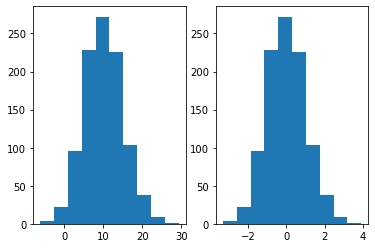

In [15]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(sample.values)
ax2.hist(scaled_sample);

## Task 4: Hypothesis Testing

We know the average for SAT scores for math as a whole in the U.S. in 2019 is 531 with a standard deviation of 104.

An SAT prep class of 45 students takes the SAT and gets the following math scores:


In [16]:
prep_class_scores = [434, 694, 457, 534, 720, 
                     400, 484, 478, 610, 641,
                     425, 636, 654, 514, 563, 
                     370, 499, 640, 501, 625, 
                     519, 471, 598, 509, 531, 
                     511, 675, 450, 485, 507, 
                     550, 612, 542, 633, 575, 
                     595, 508, 499, 490, 597, 
                     522, 504, 650, 430, 400]


Did this SAT prep class result in a significantly greater mean score than population average?

#### Define Null Hypothesis
- SAT prep class did not have a significant impact in increasing the mean score in comparison to the average
- The SAT prep students tested less than or equal to the national average <-more correct


#### Define Alternative Hypothesis
- SAT prep classes has a significant positive impact on math scores in comparison to not having taken prep classes

In [17]:
# Choose alpha
alpha = .1

#### What test are we using?
- z test
- right tail test

In [18]:
pop_mean = 531
pop_sd = 104
n = len(prep_class_scores)

In [19]:
# What is the critical statistic?
import scipy.stats
#find Z critical value
crit = scipy.stats.norm.ppf(1-alpha)
crit

1.2815515655446004

In [20]:
# What is the sample statistic? 
prep_class_scores = np.array(prep_class_scores)
sample_mean = prep_class_scores.mean()
sample_mean

538.7111111111111

In [21]:
sample_z = (sample_mean - pop_mean) / ((pop_sd)/np.sqrt(n))
sample_z
#denominator is the standard error

0.49738178730283766

In [22]:
stats.norm.cdf(sample_z)

0.6905400768007773

In [ ]:
# What is the p-value?
p = 1-stats.norm.cdf(sample_z)
p

In [ ]:
z > crit

In [ ]:
p > alpha #not significant

#### Come to a conclusion w.r.t. the null hypothesis
- reject the null hypothesis as our p value is > .05 meaning our sample that took the prep classes scores aren't significantly greater than the population

#### What is a type I error in this example (in plain English)
- we reject the null hypothesis even though the sample group scores aren't actually higher

#### What is a type II error in plain English
- type ii error is when we fail to reject the null hypothesis even though the null hypothesis should be rejected
- in this case we rsaid scores were the same even though they're higher

In [26]:
stats.norm.interval(alpha=.9, loc=prep_class_scores, scale=stats.sem(prep_class_scores))

(array([413.25980277, 673.25980277, 436.25980277, 513.25980277,
        699.25980277, 379.25980277, 463.25980277, 457.25980277,
        589.25980277, 620.25980277, 404.25980277, 615.25980277,
        633.25980277, 493.25980277, 542.25980277, 349.25980277,
        478.25980277, 619.25980277, 480.25980277, 604.25980277,
        498.25980277, 450.25980277, 577.25980277, 488.25980277,
        510.25980277, 490.25980277, 654.25980277, 429.25980277,
        464.25980277, 486.25980277, 529.25980277, 591.25980277,
        521.25980277, 612.25980277, 554.25980277, 574.25980277,
        487.25980277, 478.25980277, 469.25980277, 576.25980277,
        501.25980277, 483.25980277, 629.25980277, 409.25980277,
        379.25980277]),
 array([454.74019723, 714.74019723, 477.74019723, 554.74019723,
        740.74019723, 420.74019723, 504.74019723, 498.74019723,
        630.74019723, 661.74019723, 445.74019723, 656.74019723,
        674.74019723, 534.74019723, 583.74019723, 390.74019723,
        519.7401

In [27]:
#confidence interval = mean +- zscore*se

In [28]:
se = ((pop_sd)/np.sqrt(n))
se

15.503404643998541

In [29]:
standard_error = np.std(prep_class_scores, ddof=1)/np.sqrt(45)
standard_error

12.609144598155506

#### Create a 90% confidence interval using the sample data. 

In [30]:
#find z scores associated with .95 /.05
z=stats.norm.ppf(.95)
z

1.6448536269514722

In [31]:
np.mean(prep_class_scores) + z*se

564.2119424698884

In [32]:
np.mean(prep_class_scores) + se*(-z)

513.2102797523338

### Task 5: Hypothesis Testing 2


Samples of diastolic blood pressure were taken from a sample of 20 female doctors

In [33]:

fem_docs_dbp = [128,127,118,115,144,
                142,133,140,132,131,
                111,132,149,122,139,
                119,136,129,126,128]

The mean female population diastolic blood pressure is 120

Are female doctor diastolic blood pressures significantly higher than the female population's?

#### Null Hypothesis
- female doctor diastolic blood pressure's are less than or equal to population female blood pressures

#### Alternative Hypothesis
- female doctor's diastolic blood pressures are significantly higher than the population female blood pressures

In [67]:
# Choose an alpha
alpha = 0.05

In [75]:
# run the appropriate t-test in statsmodels and make a conclusion
stats.ttest_1samp(fem_docs_dbp, 120).pvalue/2
#1 tail test

0.00011919031815483877

In [79]:
# Type I Error in plain English
'''reject the null hypothesis and saying theres a difference between dbp even though there isnt'''

'reject the null hypothesis and saying theres a difference between dbp even though there isnt'

In [37]:
# Type II Error in plain English
'''not '''

In [38]:
# Calculate the 98% confidence interval given the array of sample blood pressures

In [39]:
# What other statsmodels ttests may we encounter?

<a id='regression'></a>

# Task 6: Linear Regression

In [40]:
from sklearn.datasets import load_diabetes

In [41]:
data = load_diabetes()

In [42]:
df = pd.concat([pd.DataFrame(data.target, columns=['target']),
                pd.DataFrame(data.data, columns=data.feature_names)
               ], axis=1)

In [43]:
df.head()

,target,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,141.0,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,135.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


One of the assumptions of linear regression is that there exists a linear relationship between the target and predictor.  

One way to go about building a First Simple model is to create a simple linear regression which uses the feature with the highest correlaton to predicts the target. Based on the pairplot below, which feature would be a good choice? 


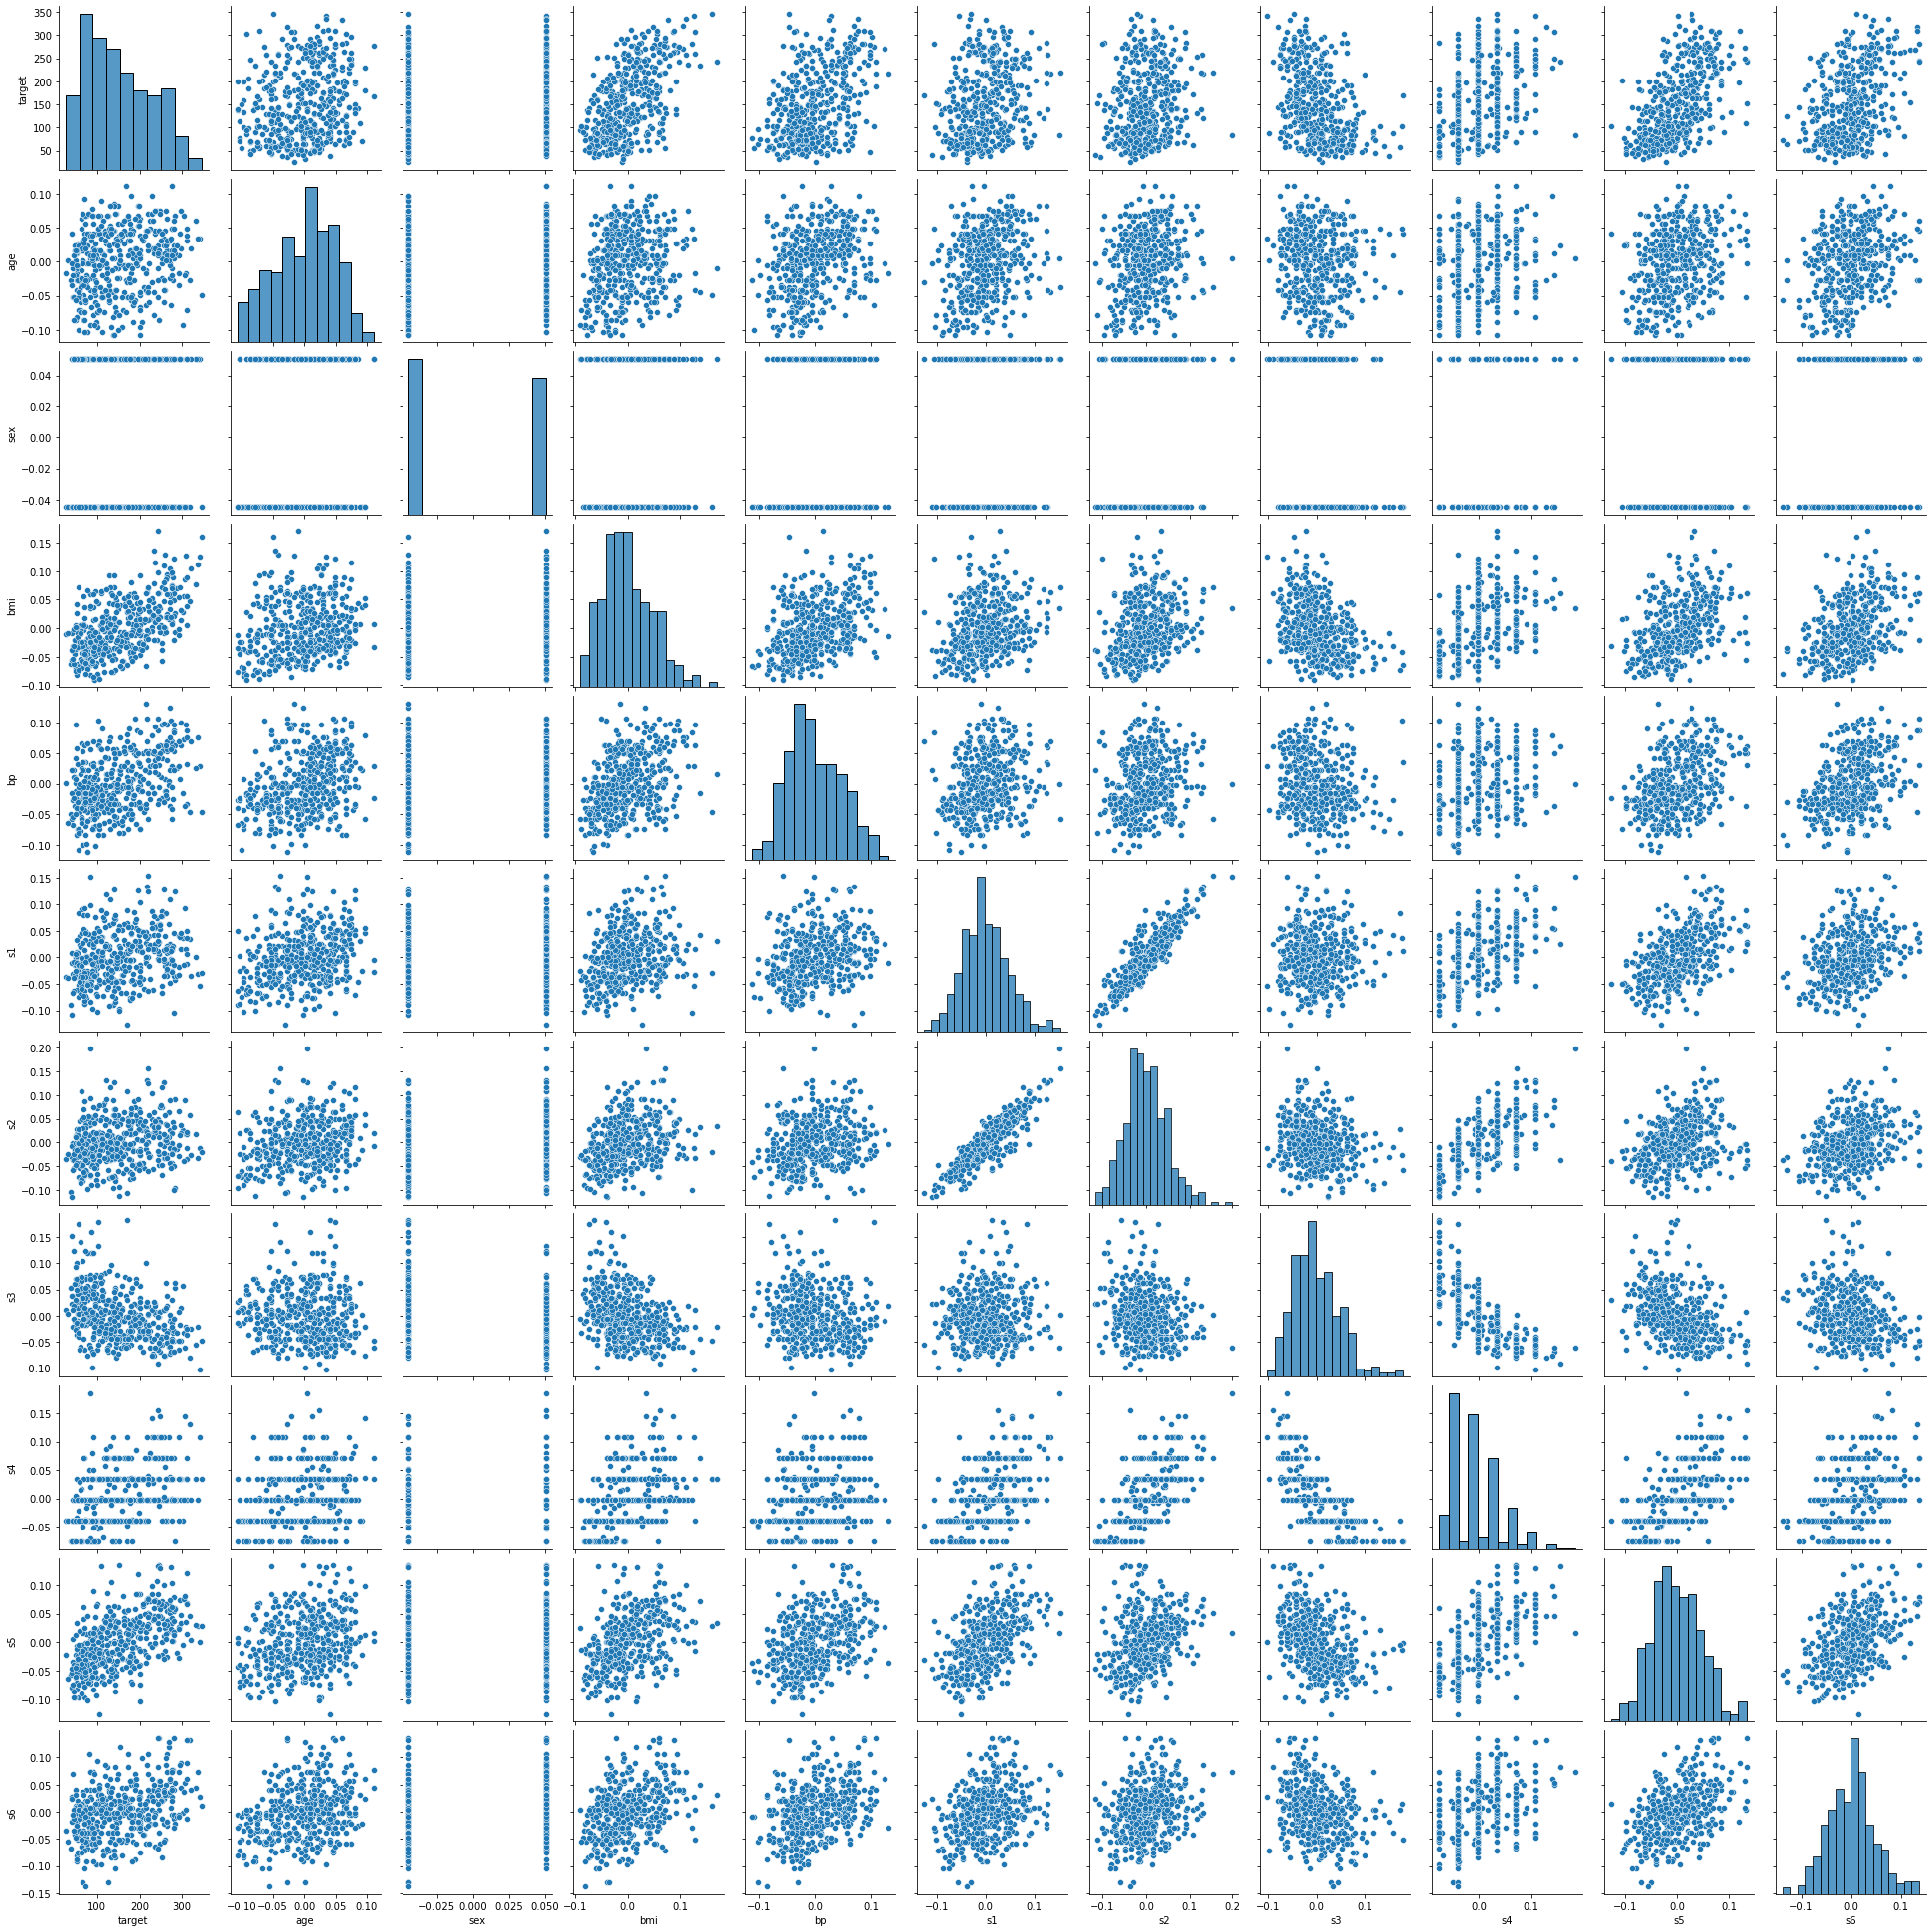

In [44]:
import seaborn as sns
sns.pairplot(df)

Use `.corr()` to reinforce this choice with numbers.

In [45]:
abs(df.corr()) > .50

,target,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
target,True,False,False,True,False,False,False,False,False,True,False
age,False,True,False,False,False,False,False,False,False,False,False
sex,False,False,True,False,False,False,False,False,False,False,False
bmi,True,False,False,True,False,False,False,False,False,False,False
bp,False,False,False,False,True,False,False,False,False,False,False
s1,False,False,False,False,False,True,True,False,True,True,False
s2,False,False,False,False,False,True,True,False,True,False,False
s3,False,False,False,False,False,False,False,True,True,False,False
s4,False,False,False,False,False,True,True,True,True,True,False
s5,True,False,False,False,False,True,False,False,True,True,False


In [46]:
df.corr()
#choose s5 and bmi correlations > .50

,target,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
target,1.000000,0.187889,0.043062,0.586450,0.441484,0.212022,0.174054,-0.394789,0.430453,0.565883,0.382483
age,0.187889,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
sex,0.043062,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133
bmi,0.586450,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680
bp,0.441484,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429
s1,0.212022,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717
s2,0.174054,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600
s3,-0.394789,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.430453,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212
s5,0.565883,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670


Build a simple linear regression using the feature chosen above with statsmodels.

In [66]:
from statsmodels.formula.api import ols #formula.api has intercept included

The stasmodels ols from formula.api take a formula as the first argument.  


In [51]:
# Create a formula which reflects the choice above
formula = 'target ~ bmi'

In [53]:
# feed the formula and dataframe into an instance of the ols class
# chain the fit method off the end to train the model
model = ols(formula, df).fit()

In [54]:
# run the summary method off the end of the fit model 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Wed, 26 May 2021   Prob (F-statistic):           3.47e-42
Time:                        14:15:11   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.974     51.162      0.000     146.289     157.978
bmi          949.4353     62.515     15.187      0.000     826.570    1072.301
==============================================================================
Omnibus:                       11.674   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.310
Skew:                           0.156   Prob(JB):                       0.0259
Kurtosis:                       2.453   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# Interpret the value of the coefficient. 
'''for every increase in unit of bmi, it will increase by 949.43
and the intercept is 152.12 - baseline n\ it is statistically significant and can keep this in our model
'''

'for every increase in unit of bmi, it will increase by 949.43\nand the intercept is 152.12 - baseline n\\ it is statistically significant and can keep this in our model\n'

In [ ]:
Your answer here

In [61]:
# Now, build another model using all of the available features
multiple_formula = 'target~' + '+'.join(df.columns[1:])
multiple_model = ols(multiple_formula, df).fit()

In [62]:
multiple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 26 May 2021   Prob (F-statistic):           3.83e-62
Time:                        14:18:51   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.061      0.000     147.071     157.196
age          -10.0122     59.749     -0.168      0.867    -127.448     107.424
sex         -239.8191     61.222     -3.917      0.000    -360.151    -119.488
bmi          519.8398     66.534      7.813      0.000     389.069     650.610
bp           324.3904     65.422      4.958      0.000     195.805     452.976
s1          -792.1842    416.684     -1.901      0.058   -1611.169      26.801
s2           476.7458    339.035      1.406      0.160    -189.621    1143.113
s3           101.0446    212.533      0.475      0.635    -316.685     518.774
s4           177.0642    161.476      1.097      0.273    -140.313     494.442
s5           751.2793    171.902      4.370      0.000     413.409    1089.150
s6            67.6254     65.984      1.025      0.306     -62.065     197.316
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
import statsmodels as sm


In [65]:
multiple_model = sm.formula.api.ols(multiple_formula, df).fit()
multiple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 26 May 2021   Prob (F-statistic):           3.83e-62
Time:                        14:26:48   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.061      0.000     147.071     157.196
age          -10.0122     59.749     -0.168      0.867    -127.448     107.424
sex         -239.8191     61.222     -3.917      0.000    -360.151    -119.488
bmi          519.8398     66.534      7.813      0.000     389.069     650.610
bp           324.3904     65.422      4.958      0.000     195.805     452.976
s1          -792.1842    416.684     -1.901      0.058   -1611.169      26.801
s2           476.7458    339.035      1.406      0.160    -189.621    1143.113
s3           101.0446    212.533      0.475      0.635    -316.685     518.774
s4           177.0642    161.476      1.097      0.273    -140.313     494.442
s5           751.2793    171.902      4.370      0.000     413.409    1089.150
s6            67.6254     65.984      1.025      0.306     -62.065     197.316
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Did adding the full suite of independent features improve our model?

> Your answer here
- yes

Given the summary output, what features would you consider dropping when further iterating on the model?

- age, s3, s6, s4, s2, s1(maybe since close to .05)
- see from pair plot and see s1 and s2 either can be dropped since they're highly correlated and correlation is .89

# Extras

## Extra Prob

What is the probability of picking a Queen first and a diamond second? 


In [ ]:
# Your code here
4/52 * 13/52

## Extra Bayes

☁️You wake up and the sky is cloudy☁️

There is a 30% chance of it raining on any given day 💧
On days when it rains there is a 95% chance of it being cloudy 🌧️
On days when it does not rain, 25% of the time there are dark clouds in the sky.
What is the probability that it will rain?

In [ ]:
'''p(rain|cloudy)= p(cloudy|rain)*p(rain)/p(c)'''

In [ ]:
'''p(c) = p(c|r) * p(r) + p(c|nr)*p(nr)'''

In [ ]:
p_rain = .3
p_c_g_r = .95
p_c_g_nr = .25
p_c = .95*.30 + .25*.7

In [ ]:
(.95*.3)/ (.3*.95 + .25*.7)

In [ ]:
(p_c_g_r*p_rain) / p_c

## Extra Hypothesis Testing

You are an archeologist.  Not Indiana Jones, the non-violent kind.  And at two sites you come across a series of shards from pots.

You know from your archeologist training that different thicknesses at the lip of the pots indicate different ceremonial functions.  

You want to test the two samples of shard thickness to see if the thickness is due to chance at the two sites.

Sample 1 has slightly thinner shards overall, so you want to test if the mean of sample 1 lip thickness is less than the mean of sample 2 lip thickness.  

Assume that the two sample variances are equal.

In [ ]:
sample_1 = [17.4715, 20.0386, 12.6012, 20.4401, 22.4969,
            9.8613, 19.6289, 9.7741, 5.9123, 17.4448, 
            10.1237, 24.9357, 15.9265, 7.9955, 17.6675, 
            13.6029, 17.8812, 16.4178, 5.1385, 7.0984, 
            18.1181, 20.2681, 14.7372, 7.1021, 16.7546]


In [ ]:
sample_2 =  [19.7475, 19.8387, 12.6873, 17.6973, 19.0878, 
             30.5562, 14.5291, 14.7627, 14.3439, 12.5745, 
             11.0734, 19.4998, 18.3869, 10.7374, 18.0030, 
             18.1730, 18.8374, 17.9287, 14.3563, 18.6004, 
             11.7280, 12.2898, 21.0552, 21.4184, 25.5953]


In [ ]:
# Define Null/Alternative Hypotheses


In [ ]:
# Choose alpha


In [ ]:
# What test are we using?



In [ ]:
# What is the critical statistic?


In [ ]:
# Use statsmodels to run the appropriate test.


In [ ]:
# Come to a conclusion w.r.t. the null hypothesis


In [ ]:
# What is a type I error in plain English

In [ ]:
# What is a type II error in plain English